## Assignment 2: $k$ Nearest Neighbor

### Do any four.

In [19]:
! git clone https://github.com/karen-tran08/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. They are both predictive models that map features/covariates, xhat, to targets/outcomes, yhat. The difference is that if the target variable y is categorical (we are trying to predict a category), then we would use classification. If it is numeric (we are trying to predict a number), we would use regression.
2. Confusion matrices are tables that compare actual (true) labels with predicted labels. It shows how many predictions are correct, incorrect, or type of error. It is only used for classification problems and not regression.
3. Accuracy tells us the proportion of the cases we predicted correctly. It simplifies the confusion matrix into a single summary number. Accuracy is not always a suffcient measure to evaluate a classifier's predictive performance because they can be misleading if classes are imbalanced or errors have different costs.
4. Root mean squared error is the summary number for regression. It represents the distance from the true values to the predicted ones and is weighted by sample size (as n gets large, these values typically approach some fixed value).
5. In the context of kNN, k is a huperparamter that controls how the omdel makes predictions. k is the number of nearest neightbots the model looks at when deciding. Choosing a k that is too small causes overfitting since the model is overly sensitive to a handful of data points (noisy predictions). Choosing a k that is too large causes underfitting since the model averages over many observations and will give answers close to the population proportion.
6. Splitting the data ensures that we evaluate model performance on data it hasn't seen before, which is what we care about. If a new case is presented, we want to know if our prediction is likely to be accurate. The training set is for the learning aspect while the test set is for realistic evaluation. Choosing hyperparameters like k based on test set performance helps select a model that performs best on unseen data, not just training data. By splitting the data and analyzing unseen examples, we avoid overfitting and pick a model that actually works in real-world predictions.
7.

**Class Label**: Outputs a single class as the prediction

Pros
  * Simple and easy to use
  * You don't need to convert probabilities to labels
  * Good for balanced datasets

Cons
  * No measure of confidence
  * Hard to handle uncertainty
  * Less flexible

**Probability Distribution**: Outputs probabilities for each class instead of a single label

Pros
  * Shows confidence, helps understand certainty of prediction
  * For more advanced cases
  * Better for imbalanced data

Cons
  * More complex
  * Probabilities can be poorly calibrated
  * May be unnecessary

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ldf = pd.read_csv('./data/land_mines.csv', encoding='latin1')
ldf.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [89]:
ldf.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


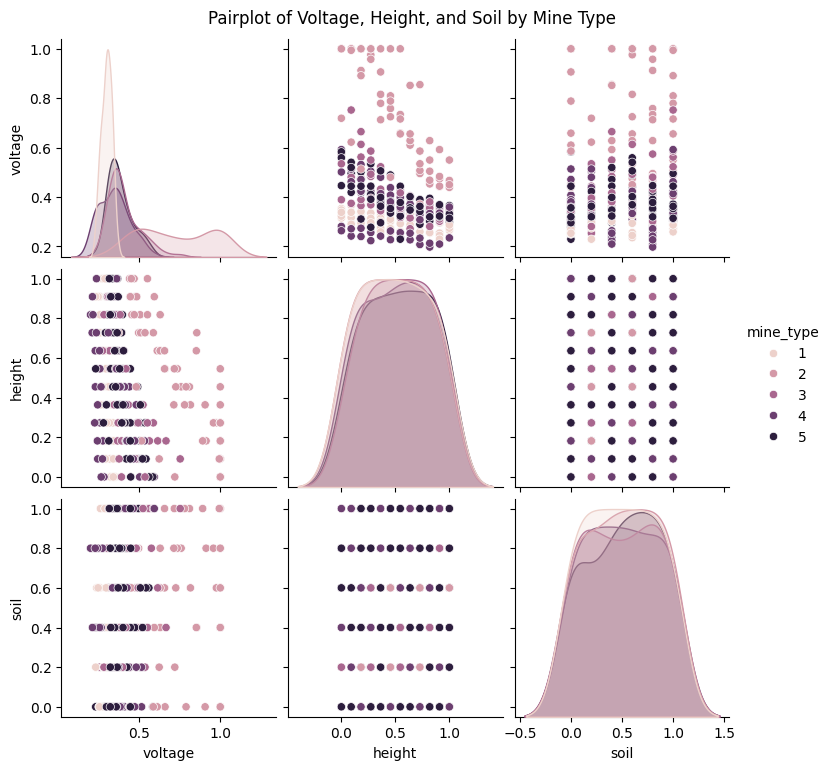

In [93]:
sns.pairplot(ldf[['voltage', 'height', 'soil', 'mine_type']], hue='mine_type')
plt.suptitle('Pairplot of Voltage, Height, and Soil by Mine Type', y=1.02)
plt.show()

In [90]:
ldf.isna().sum()

,0
voltage,0
height,0
soil,0
mine_type,0


In [95]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = ldf[['voltage', 'height', 'soil']]
y = ldf['mine_type']

# Split the data into training and testing sets (50/50)
# Use stratify=y to ensure an even distribution of mine_type in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} observations")
print(f"Test set size: {X_test.shape[0]} observations")
print(f"\nDistribution of mine_type in training set:\n{y_train.value_counts(normalize=True)}")
print(f"\nDistribution of mine_type in test set:\n{y_test.value_counts(normalize=True)}")

Training set size: 169 observations
Test set size: 169 observations

Distribution of mine_type in training set:
mine_type
1    0.207101
2    0.207101
3    0.195266
5    0.195266
4    0.195266
Name: proportion, dtype: float64

Distribution of mine_type in test set:
mine_type
1    0.213018
2    0.207101
3    0.195266
4    0.195266
5    0.189349
Name: proportion, dtype: float64


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values_classification = range(1, 31) # From 1 to 30

# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Loop through each k value
for k in k_values_classification:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred_classification = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_classification)
    accuracy_scores.append(accuracy)

    print(f"Accuracy for k={k}: {accuracy:.4f}")


Accuracy for k=1: 0.4024
Accuracy for k=2: 0.4379
Accuracy for k=3: 0.3787
Accuracy for k=4: 0.3550
Accuracy for k=5: 0.3136
Accuracy for k=6: 0.3254
Accuracy for k=7: 0.3136
Accuracy for k=8: 0.3136
Accuracy for k=9: 0.3491
Accuracy for k=10: 0.3373
Accuracy for k=11: 0.3550
Accuracy for k=12: 0.3373
Accuracy for k=13: 0.3491
Accuracy for k=14: 0.3136
Accuracy for k=15: 0.3314
Accuracy for k=16: 0.3432
Accuracy for k=17: 0.3609
Accuracy for k=18: 0.3373
Accuracy for k=19: 0.3373
Accuracy for k=20: 0.3432
Accuracy for k=21: 0.3609
Accuracy for k=22: 0.3491
Accuracy for k=23: 0.3195
Accuracy for k=24: 0.3432
Accuracy for k=25: 0.3550
Accuracy for k=26: 0.3373
Accuracy for k=27: 0.3669
Accuracy for k=28: 0.3491
Accuracy for k=29: 0.3728
Accuracy for k=30: 0.3728


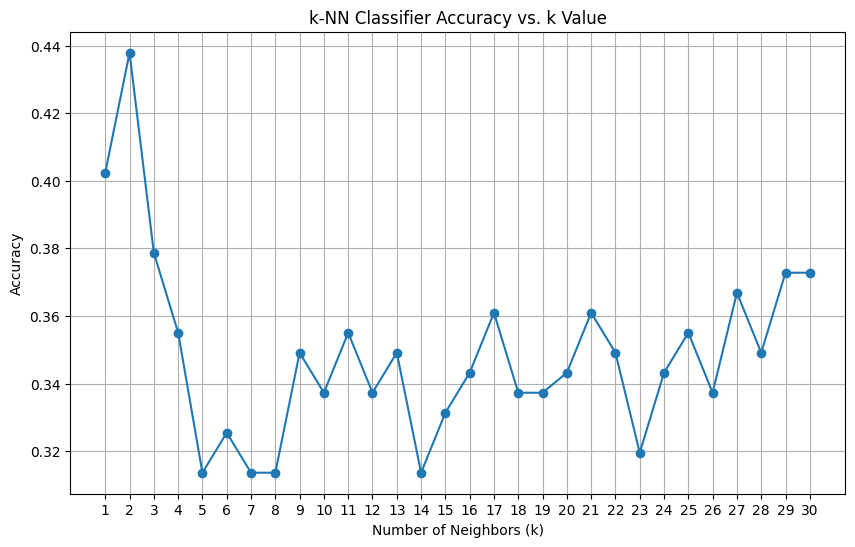

The optimal k value is: 2
The highest accuracy achieved is: 0.4379


In [97]:
import matplotlib.pyplot as plt

# Plot the accuracy scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values_classification, accuracy_scores, marker='o', linestyle='-')
plt.title('k-NN Classifier Accuracy vs. k Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(list(k_values_classification))
plt.grid(True)
plt.show()

# Find the optimal k value (the one with the highest accuracy)
optimal_k_index = accuracy_scores.index(max(accuracy_scores))
optimal_k = k_values_classification[optimal_k_index]
optimal_accuracy = max(accuracy_scores)

print(f"The optimal k value is: {optimal_k}")
print(f"The highest accuracy achieved is: {optimal_accuracy:.4f}")

By examining the plot and the calculated accuracy scores, we identified the `k` value that yielded the highest accuracy on the test set. In this case, the optimal `k` value was 2, with a highest accuracy of approximately 0.4379.

This process helps us select a model that generalizes well to unseen data, balancing between underfitting (too large `k`, overly generalized model) and overfitting (too small `k`, overly sensitive to training data noise). An optimal `k` of 2 suggests that considering only the two nearest neighbors provided the best predictive performance for this specific dataset and split.

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Use the optimal_k determined for the classification problem
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

# Confusion matrix
confusionMatrix = confusion_matrix(y_test, y_hat)

print("Confusion Matrix:")
print(confusionMatrix)

# Accuracy
accuracy = accuracy_score(y_test, y_hat)
print("Test Accuracy:", accuracy)

Confusion Matrix:
[[25  0  6  4  1]
 [ 0 32  0  3  0]
 [12  2  9  6  4]
 [12  5  8  8  0]
 [15  2 10  5  0]]
Test Accuracy: 0.4378698224852071


 The overall test accuracy of the model is approximately 43.79%. This means that the model correctly predicts the mine_type for about 43.79% of the cases in the test set. Given there are 5 classes, a random guess would yield 20% accuracy, so the model is better than random, but it's still relatively low. Mine Type 2 (high true positives, few false negatives) is most accurate.
Mine Type 5 (zero true positives, all misclassified), Mine Type 3, and Mine Type 4 (very low true positives, high false negatives and false positives) are least accurate.

Given the low overall accuracy, I would not rely soley on this model particularly to identify Mine Type 5 (0 correct predictions). The current model isn't completely suitable for operational use in a high-stakes enviornemtn due to its high error rates for critical categories.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [20]:
cdf = pd.read_csv('./data/USA_cars_datasets.csv', encoding='latin1')
cdf.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [21]:
cdf.isna().sum()
# There are no NAs to handle

,0
Unnamed: 0,0
price,0
brand,0
model,0
year,0
title_status,0
mileage,0
color,0
vin,0
lot,0


In [22]:
def MinMaxScaler(x):
    u = (x - x.min()) / (x.max() - x.min())
    return u

cdf['year'] = MinMaxScaler(cdf['year'])
cdf['mileage'] = MinMaxScaler(cdf['mileage'])

display(cdf.head())

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,0.744681,clean vehicle,0.269287,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,0.808511,clean vehicle,0.187194,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,0.957447,clean vehicle,0.038892,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,0.872340,clean vehicle,0.063016,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,0.957447,clean vehicle,0.006537,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = cdf[['year', 'mileage']]
y = cdf['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} observations")
print(f"Test set size: {X_test.shape[0]} observations")

Training set size: 1999 observations
Test set size: 500 observations


In [24]:
from sklearn.neighbors import KNeighborsRegressor
k = 3
model = KNeighborsRegressor(n_neighbors = k) # Create a model instance
model = model.fit(X_train,y_train) # Fit the model
y_hat = model.predict(X_test) # Prediction

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]
mse_scores = []
y_test_list = []
y_pred_list = []
k_values_actual = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    mse_scores.append(mse)
    y_test_list.append(y_test) # Storing y_test for each k for consistency, though it's the same
    y_pred_list.append(y_pred)
    k_values_actual.append(k)

    print(f"Mean Squared Error for k={k}: {mse:.2f}")


Mean Squared Error for k=3: 148065935.52
Mean Squared Error for k=10: 117399126.11
Mean Squared Error for k=25: 112576160.82
Mean Squared Error for k=50: 110202549.30
Mean Squared Error for k=100: 112253932.82
Mean Squared Error for k=300: 114496301.83


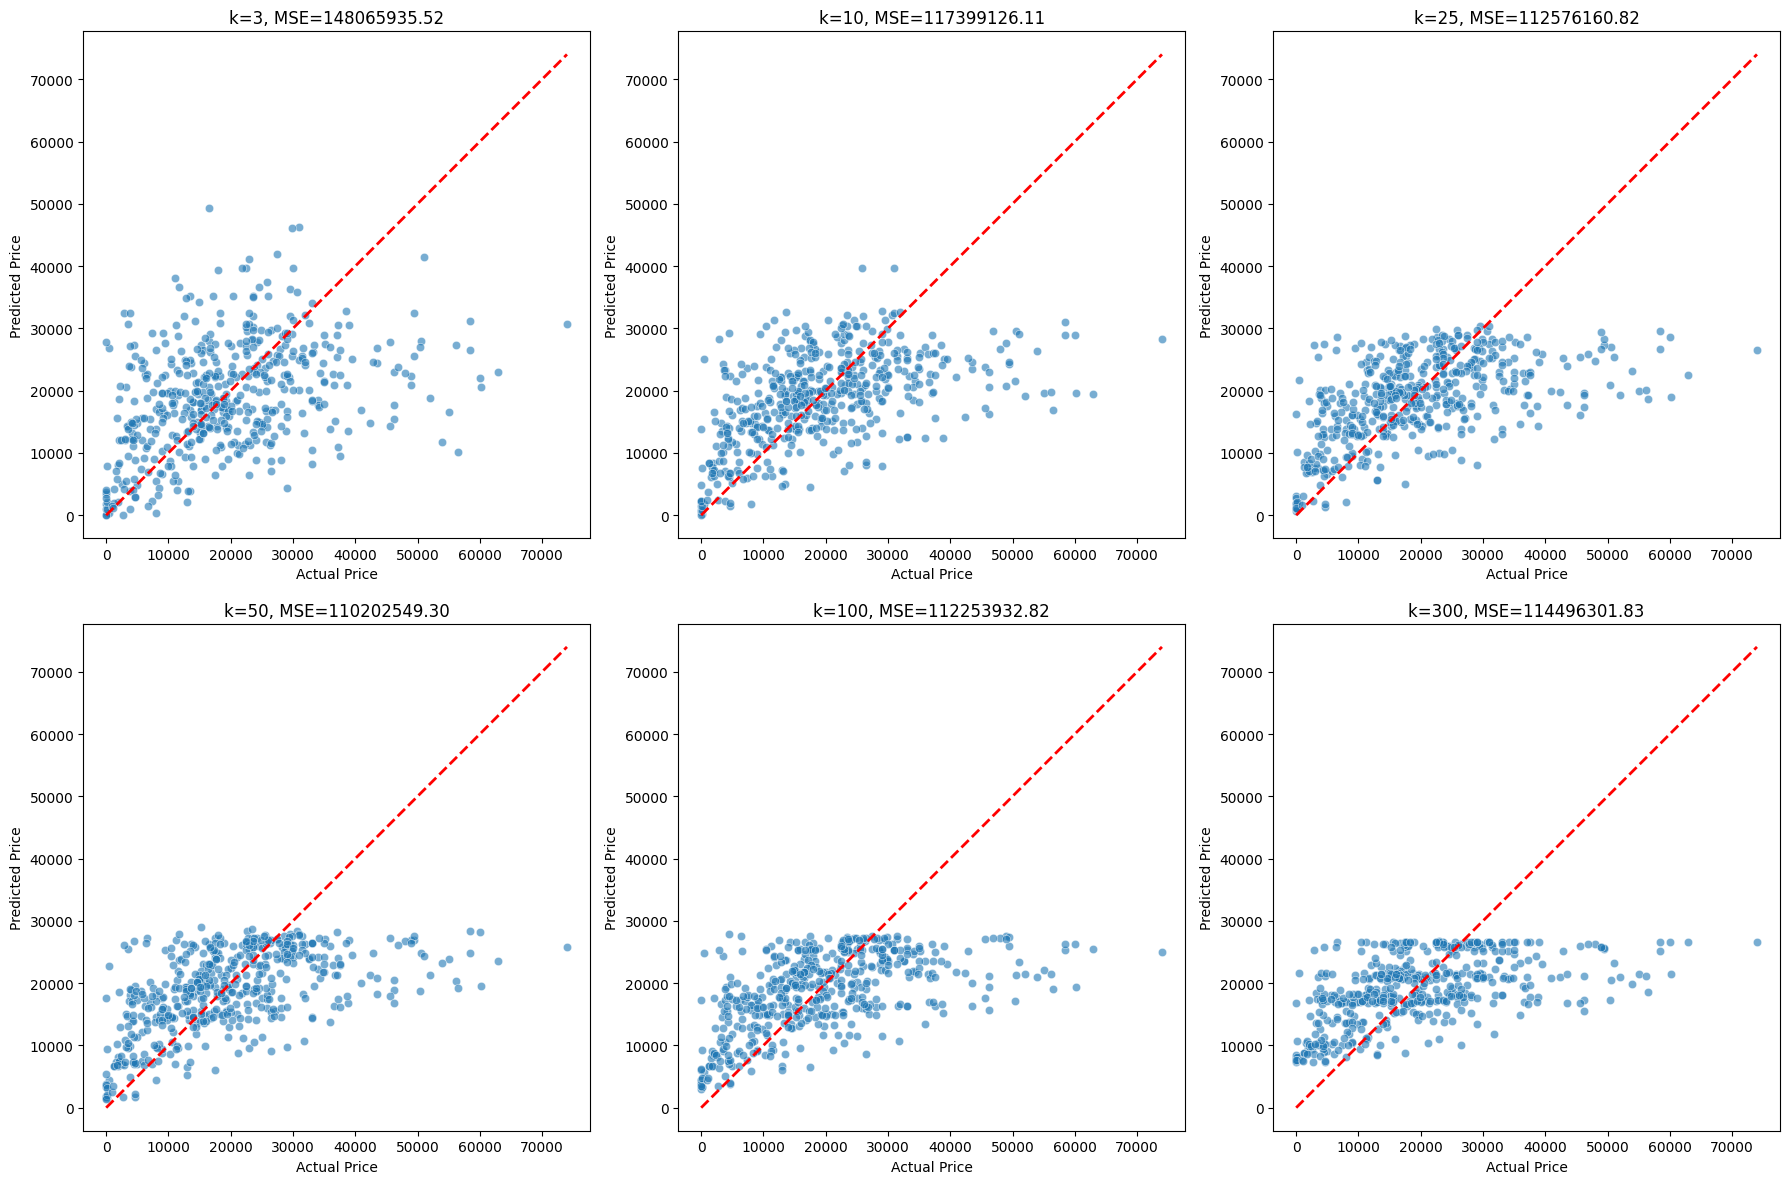

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, k_val in enumerate(k_values_actual):
    ax = axes[i]
    sns.scatterplot(x=y_test_list[i], y=y_pred_list[i], ax=ax, alpha=0.6)
    ax.plot([y_test_list[i].min(), y_test_list[i].max()], [y_test_list[i].min(), y_test_list[i].max()], 'r--', lw=2)
    ax.set_title(f'k={k_val}, MSE={mse_scores[i]:.2f}')
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()


The k-NN regression analysis demonstrated a clear relationship between the `k` value, Mean Squared Error (MSE), and prediction patterns. As `k` increased from 3, the MSE generally decreased, reaching a minimum of 110,202,549.30 at `k=50`. MSE slightly increased for larger `k` values. For small `k` (`k=3`), predictions were highly scattered and variable, indicating a tendency towards overfitting. As `k` increased, the predictions became smoother and less dispersed, suggesting better generalization. However, for very large `k` (`k=300`), the slight rise in MSE implied potential underfitting.


5. The optimal k for the data is 50.
6.

As k increased from 3, the MSE generally decreased, reaching a minimum at k=50. Beyond this point, the MSE slightly increased for larger k values. This trend demonstrates the bias-variance trade-off:

For small k (k=3), the predictions were highly scattered, indicating overfitting. The model was too sensitive to individual  points and noise in the training data, leading to poor generalization on unseen test data.
As k increased, the predictions became less dispersed (better generalization). The scatter points clustered closer to the 45-degree reference line, indicating more accurate predictions.
For a really large k (k=300), the slight rise in MSE might imply underfitting. The model averages over too many observations, losing its ability to show local patterns and leading to overly generalized predictions. The k=50 value provided the best balance, achieving the lowest MSE and capturing data points while avoiding excessive sensitivity to noise.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [36]:
adf = pd.read_csv('./data/airbnb_hw.csv', encoding='latin1')
adf = adf.loc[:, ['Review Scores Rating', 'Price', 'Beds']]
adf.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


In [86]:
missing_reviews_df = adf[adf['Review Scores Rating'].isnull()]

missing_reviews_df.head()

,Review Scores Rating,Price,Beds
0,NaN,145.0,1.0
1,NaN,37.0,1.0
2,NaN,28.0,1.0
3,NaN,199.0,3.0
13,NaN,68.0,1.0


In [87]:
adf_cleaned = adf.dropna(axis=0, how='any')

# 1. Separate features (X) and target (y) from the cleaned DataFrame
X_complete = adf_cleaned[['Price', 'Beds']]
y_complete = adf_cleaned['Review Scores Rating']

# 2. Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# 3. Fit and transform the features, preserving the index
X_scaled = pd.DataFrame(scaler.fit_transform(X_complete), columns=X_complete.columns, index=X_complete.index)

# 4. Split the data into training and testing sets
X_train_complete, X_test_complete, y_train_complete, y_test_complete = train_test_split(X_scaled, y_complete, test_size=0.2, random_state=42)


In [84]:
k_values = range(1, 31)
sse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_complete, y_train_complete)
    y_pred = knn.predict(X_test_complete)
    sse = np.sum((y_test_complete - y_pred)**2)

    sse_values.append(sse)

best_k = k_values[np.argmin(sse_values)]

print("Best k:", best_k)
print("Minimum SSE:", min(sse_values))

Best k: 29
Minimum SSE: 325333.68370986916


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_scaled, y)

In [43]:
k_values_to_test = range(1, 31) # Iterate through k from 1 to 30

min_mse = float('inf')
optimal_k = -1

mse_results = []

for k in k_values_to_test:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_complete, y_train_complete)
    y_pred_complete = knn_model.predict(X_test_complete)
    mse = mean_squared_error(y_test_complete, y_pred_complete)
    mse_results.append({'k': k, 'mse': mse})
    print(f"k = {k}: MSE = {mse:.2f}")

    if mse < min_mse:
        min_mse = mse
        optimal_k = k
print(f"\nOptimal k: {optimal_k} with Minimum MSE: {min_mse:.2f}")

k = 1: MSE = 261.44
k = 2: MSE = 130.29
k = 3: MSE = 110.14
k = 4: MSE = 97.92
k = 5: MSE = 91.54
k = 6: MSE = 87.95
k = 7: MSE = 85.33
k = 8: MSE = 82.13
k = 9: MSE = 79.30
k = 10: MSE = 78.46
k = 11: MSE = 77.86
k = 12: MSE = 77.03
k = 13: MSE = 76.43
k = 14: MSE = 75.85
k = 15: MSE = 75.99
k = 16: MSE = 75.31
k = 17: MSE = 74.90
k = 18: MSE = 74.76
k = 19: MSE = 74.36
k = 20: MSE = 74.45
k = 21: MSE = 74.51
k = 22: MSE = 74.35
k = 23: MSE = 74.20
k = 24: MSE = 74.09
k = 25: MSE = 74.08
k = 26: MSE = 74.07
k = 27: MSE = 73.95
k = 28: MSE = 73.68
k = 29: MSE = 73.55
k = 30: MSE = 73.66

Optimal k: 29 with Minimum MSE: 73.55


In [83]:
# Instantiate the final k-NN model with the optimal k
final_knn_model = KNeighborsRegressor(n_neighbors=29)

# Train the final model on all normalized complete cases
final_knn_model.fit(X_scaled, y_complete)

print(f"Final k-NN model trained with optimal k={29}.")

Final k-NN model trained with optimal k=29.


In [78]:
missing_reviews_df['Price'] = missing_reviews_df['Price'].astype(str).str.replace(',', '').astype(float)
X_missing = missing_reviews_df[['Price', 'Beds']]

X_missing_cleaned = X_missing.dropna(axis=0, how='any')

original_indices = X_missing_cleaned.index

X_missing_scaled = pd.DataFrame(scaler.transform(X_missing_cleaned), columns=X_missing_cleaned.columns, index=original_indices)

predicted_missing_ratings = final_knn_model.predict(X_missing_scaled)

missing_reviews_df.loc[original_indices, 'Review Scores Rating'] = predicted_missing_ratings

display(missing_reviews_df.head())

/tmp/ipython-input-250518232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_reviews_df['Price'] = missing_reviews_df['Price'].astype(str).str.replace(',', '').astype(float)


,Review Scores Rating,Price,Beds
0,93.896552,145.0,1.0
1,90.655172,37.0,1.0
2,83.103448,28.0,1.0
3,88.310345,199.0,3.0
13,91.448276,68.0,1.0


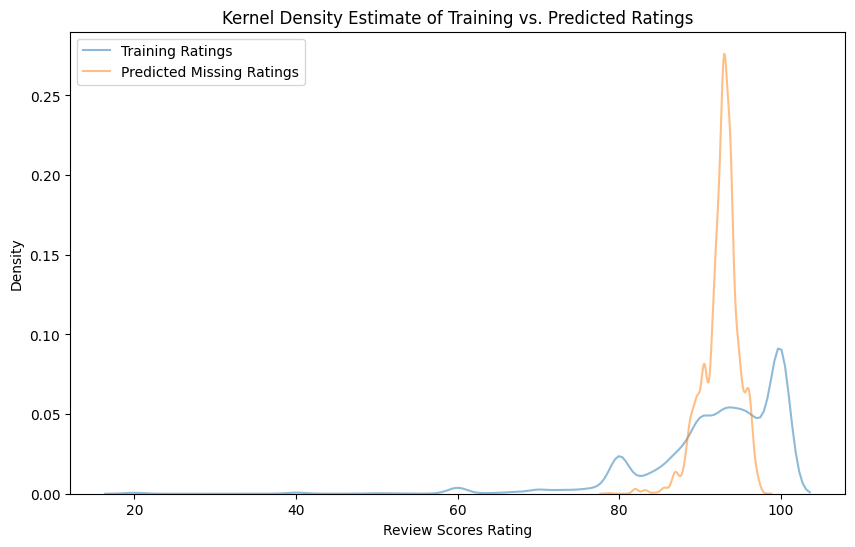

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_complete, label='Training Ratings', fill=False, alpha=0.5)
sns.kdeplot(predicted_missing_ratings, label='Predicted Missing Ratings', fill=False, alpha=0.5)
plt.title('Kernel Density Estimate of Training vs. Predicted Ratings')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')
plt.legend()

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)